In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.special import boxcox
from scipy import stats
attributes =('class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanine', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline')
df = pd.read_csv('C:/Users/Msc 1/Downloads/wine/wine.data', names = attributes)
df.columns = attributes
df  #assigning names/attributes to all columns

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanine,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.drop('class', axis=1, inplace = True)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanine,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


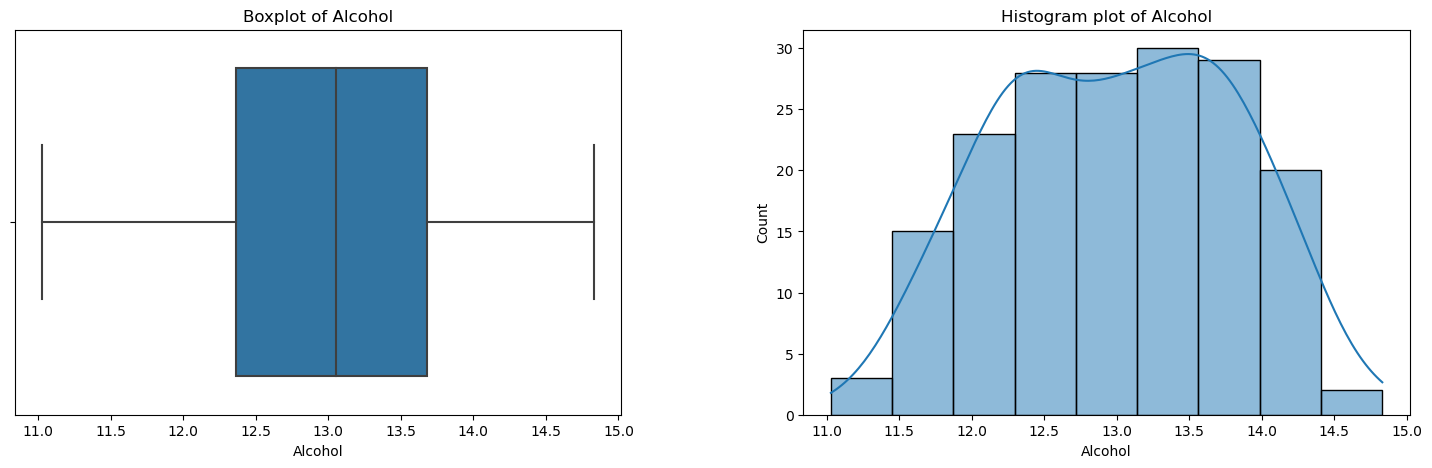

In [3]:
fig , axes = plt.subplots(1,2,figsize=(18,5))
fig.subplots_adjust(hspace=0.3,wspace=0.3)

sns.boxplot(data = df, x = 'Alcohol', ax=axes[0])
sns.histplot(kde=True,data=df,x='Alcohol', ax=axes[1])

axes[0].set_title("Boxplot of Alcohol")
axes[1].set_title("Histogram plot of Alcohol")
plt.show()

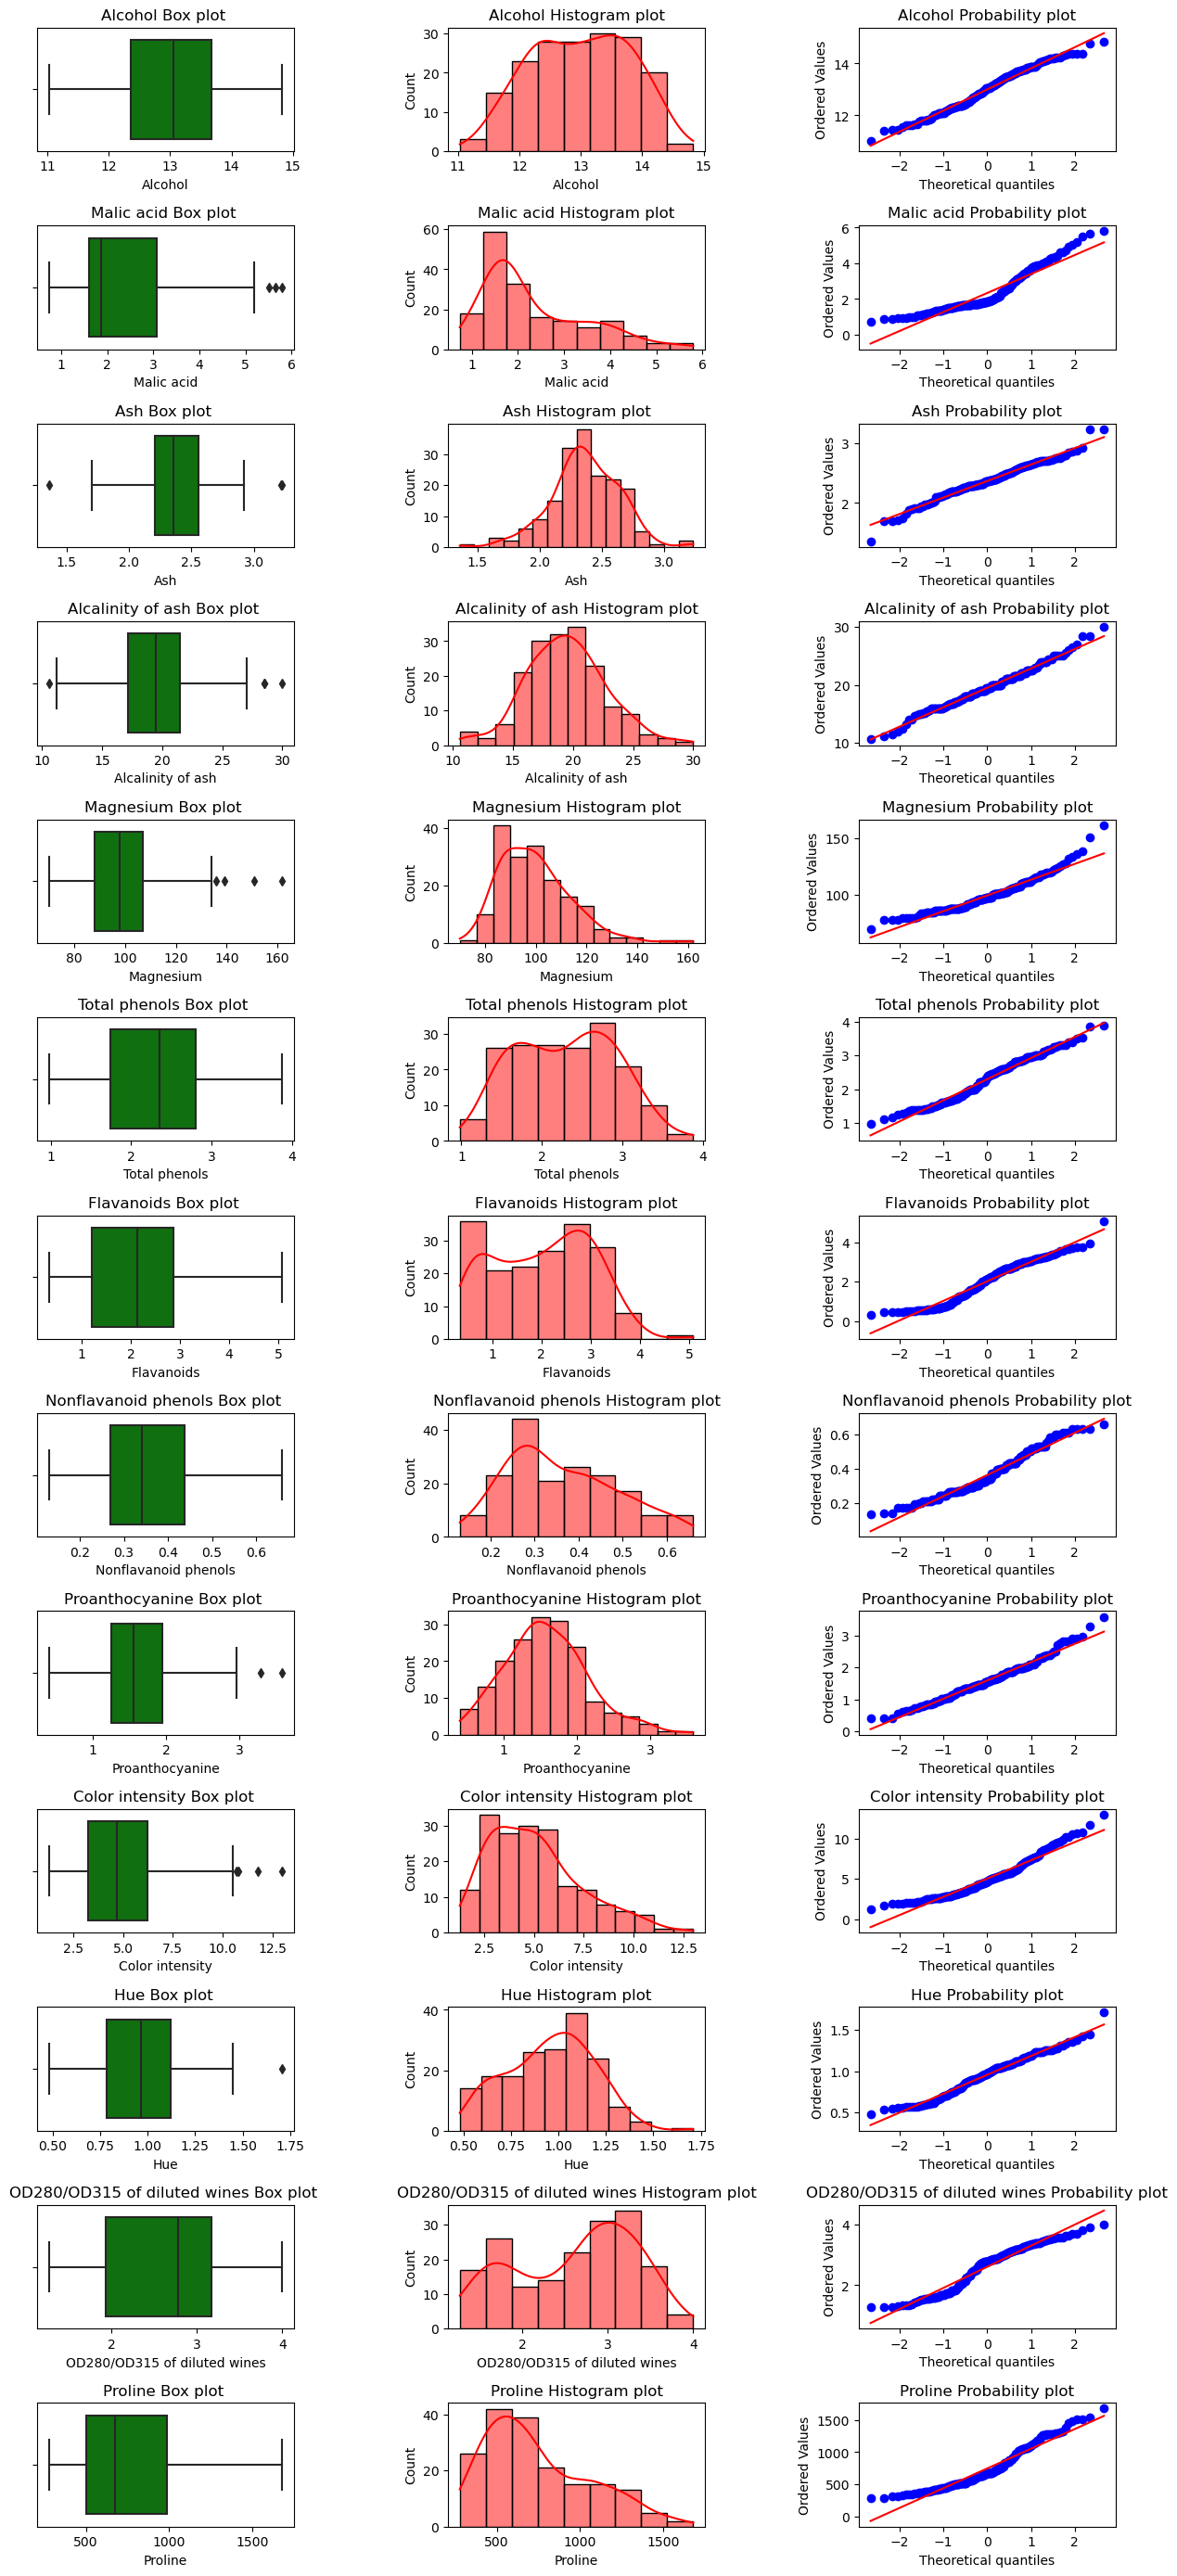

In [14]:
#plotting graphs before transformation
fig, axes = plt.subplots(13,3, figsize=(15,35)) #number of rows and columns along with mentioning size 
fig.subplots_adjust(hspace=0.6, wspace=0.6) #adjust distances between each plot(height and width)
i=0 
for feature in df.columns:
    sns.boxplot(data = df, x = feature, ax=axes[i,0], color='green')  
    sns.histplot(kde=True,data=df,x=feature, ax=axes[i,1], color='red')
    stats.probplot(x=df[feature], plot=axes[i,2])
   
        
    axes[i,0].set_title('{} Box plot '. format(feature))
    axes[i,1].set_title('{} Histogram plot'. format(feature))
    axes[i,2].set_title('{} Probability plot'. format(feature))
    
    i+=1

    Inferences before transformation:

1. Alcohol is little left skewed.
2. Malic acid is heavily right skewed, and it has outliers too.
3. Ash is left skewed, and has outliers.
4. Alcalinity of ash is little left skewed, but can be considered as normal.
5. Magnesium is right skewed, along with it's outliers.
6. Total phenols are right skewed, and no outliers.
7. Flavanoids are heavily right skewed too, with no outliers.
8. Nonflavanoid phenols are right skewed.
9. Proanthocyanine is a little right skewed, but has outliers.
10. Color intensity is also right skewed.
11. Hue can be considered as normal data.
12. OD280/OD315 of diluted wines is little right skewed, and can be considered normal.
13. Proline is very much right skewed with zero outliers. 

In [5]:
skew_val = {}
skew_val = df.skew()
skew_val

Alcohol                        -0.051482
Malic acid                      1.039651
Ash                            -0.176699
Alcalinity of ash               0.213047
Magnesium                       1.098191
Total phenols                   0.086639
Flavanoids                      0.025344
Nonflavanoid phenols            0.450151
Proanthocyanine                 0.517137
Color intensity                 0.868585
Hue                             0.021091
OD280/OD315 of diluted wines   -0.307285
Proline                         0.767822
dtype: float64

In [6]:
transformed_df=pd.DataFrame()
lamb_values={}

for feature in df.columns:
    x=df[feature]
    arr, lamb = sp.stats.boxcox(x)
    transformed_df[feature]=arr
    lamb_values[feature]=lamb
    
for feature, lamb in lamb_values.items():
    print('{}: {}'.format(feature, lamb))

Alcohol: 1.2645832170642062
Malic acid: -0.2777553299119975
Ash: 1.4274804565551202
Alcalinity of ash: 0.6919715190731625
Magnesium: -1.4291229687602396
Total phenols: 0.6859232927312355
Flavanoids: 0.7349769472925217
Nonflavanoid phenols: 0.2680866130069868
Proanthocyanine: 0.5674163105392768
Color intensity: 0.07589005110579095
Hue: 0.8855434430706487
OD280/OD315 of diluted wines: 1.3761931905305107
Proline: -0.10330889162354384


In [7]:
transformed_skewvalues = {}

for feature in df.columns:
    lamb = lamb_values[feature]
    boxcox = ( (df[feature] ** lamb) - 1 ) / lamb
    transformed_skewvalues[feature] = boxcox.skew()
    
for feature, boxcox in transformed_skewvalues.items():
    print("{}: {}".format(feature, boxcox))

Alcohol: -0.023100216903530365
Malic acid: 0.02705533278901975
Ash: 0.05451952647078125
Alcalinity of ash: 0.01798822314509051
Magnesium: 0.0063529133891043485
Total phenols: -0.06103072489920033
Flavanoids: -0.1860890966134892
Nonflavanoid phenols: -0.021171264030068592
Proanthocyanine: 0.004079668699416989
Color intensity: -0.00718428294803126
Hue: -0.0433574383482985
OD280/OD315 of diluted wines: -0.17374922969904125
Proline: 0.012054931473743811


In [8]:
skew_val = dict(skew_val)
skew_val_list = list(skew_val.values())
transformed_skewvalues_list = list(transformed_skewvalues.values())
lamb_values_list = list(lamb_values.values())
attributes = ['Alcohol','Malic Acid','Ash','Alcanlinity of ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [9]:
data = {
    'Attribute': attributes,
    'skew': skew_val_list,
    'transform_skew': transformed_skewvalues_list,
    'lambda': lamb_values_list
}

dframe = pd.DataFrame(data)

In [10]:
dframe

,Attribute,skew,transform_skew,lambda
0,Alcohol,-0.051482,-0.023100,1.264583
1,Malic Acid,1.039651,0.027055,-0.277755
2,Ash,-0.176699,0.054520,1.427480
3,Alcanlinity of ash,0.213047,0.017988,0.691972
4,Magnesium,1.098191,0.006353,-1.429123
5,Total Phenols,0.086639,-0.061031,0.685923
6,Flavanoids,0.025344,-0.186089,0.734977
7,Nonflavanoid phenols,0.450151,-0.021171,0.268087
8,Proanthocyanins,0.517137,0.004080,0.567416
9,Color Intensity,0.868585,-0.007184,0.075890


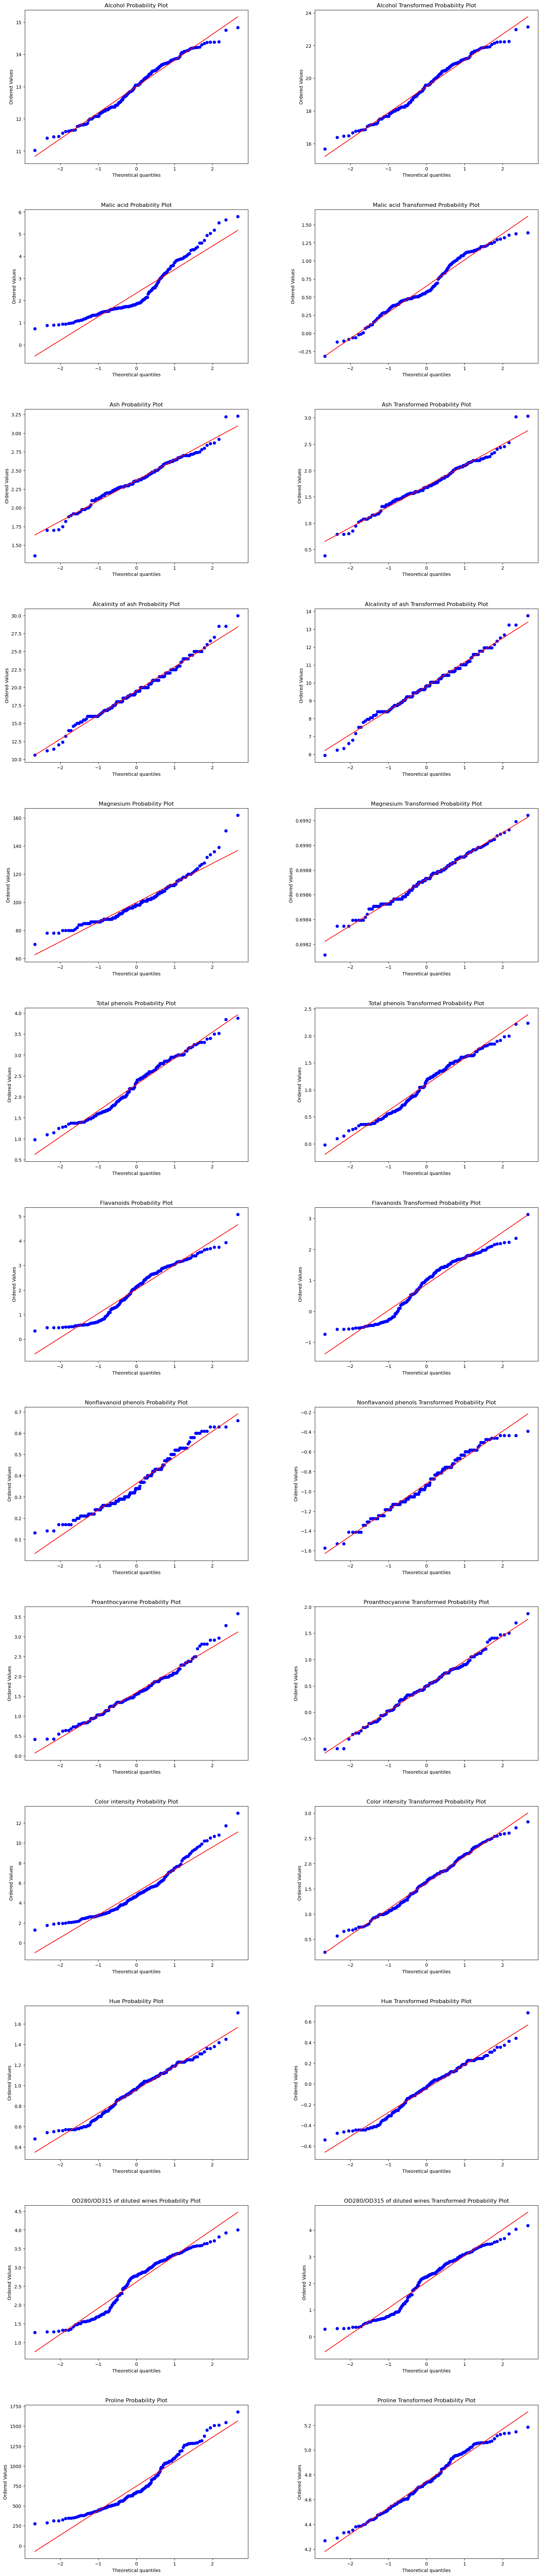

In [16]:
fig, axes = plt.subplots(13,2,figsize=(20,100)) # required rows,cols and plotsize
fig.subplots_adjust(hspace=0.3, wspace=0.3)

i=0
for feature in df.columns:
    lamb = lamb_values[feature]
    boxcox = ( (df[feature] ** lamb) - 1 ) / lamb
    transformed_skewvalues[feature] = boxcox.skew()
    stats.probplot(df[feature],plot=axes[i,0])
    stats.probplot(boxcox,plot=axes[i,1])
    
    axes[i,0].set_title('{} Probability Plot'.format(feature))
    axes[i, 1].set_title('{} Transformed Probability Plot'.format(feature))

    i += 1    

    Inferences after transformation:

1. Alcohol is little left skewed.
2. Malic acid is comparitively less right skewed, and it has outliers too.
3. Ash is right skewed, and has outliers.
4. Alcalinity of ash is little left skewed, but can be considered as normal.
5. Magnesium is normal.
6. Total phenols are left skewed, and no outliers.
7. Flavanoids are left skewed too, with no outliers.
8. Nonflavanoid phenols are little left skewed.
9. Proanthocyanine can be considered normal.
10. Color intensity is left skewed.
11. Hue is left skewed.
12. OD280/OD315 of diluted wines is left skewed.
13. Proline is comparitively less right skewed with zero outliers. 